In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and configure FEC and CS timestamp data as dataframe

In [2]:
df_fec = pd.read_csv("../FEC/mouse_0_fec.csv")  # df containing eyeblink fraction info
df_cs = pd.read_csv("../stim/mouse_0_stim.csv")  # df containing timestamp of CS for each trial

In [3]:
print(len(df_fec))
df_fec.head()

12584


,Current Timestamp,Trial #,FEC
0,5.252085e+08,0.0,0.455163
1,5.252085e+08,0.0,0.455163
2,5.252085e+08,0.0,0.455163
3,5.252085e+08,0.0,0.455163
4,5.252085e+08,0.0,0.455163


In [4]:
print(len(df_cs))
df_cs.head()

1


,Trial #,CS Timestamp
0,0.0,5.252086e+08


### Combine dataframes 

In [5]:
# Merge the dataframes based on the 'Trial #' column
merged_df = pd.merge(df_fec, df_cs, on='Trial #', how='left')
merged_df['Trial #'] = merged_df['Trial #'].astype(int)  # convert trial # to integer value
merged_df.head()

,Current Timestamp,Trial #,FEC,CS Timestamp
0,5.252085e+08,0,0.455163,5.252086e+08
1,5.252085e+08,0,0.455163,5.252086e+08
2,5.252085e+08,0,0.455163,5.252086e+08
3,5.252085e+08,0,0.455163,5.252086e+08
4,5.252085e+08,0,0.455163,5.252086e+08


## Recreate graph of "FEC vs. Time from CS onset" from the paper

In [8]:
filter = (merged_df['Current Timestamp'] >= merged_df['CS Timestamp'])
df = merged_df[filter]
df.head()

,Current Timestamp,Trial #,FEC,CS Timestamp
657,5.252086e+08,0,0.455163,5.252086e+08
658,5.252086e+08,0,0.455163,5.252086e+08
659,5.252086e+08,0,0.455163,5.252086e+08
660,5.252086e+08,0,0.455163,5.252086e+08
661,5.252086e+08,0,0.455163,5.252086e+08


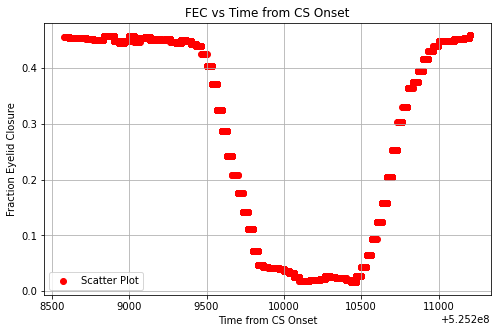

In [9]:
# Create plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Current Timestamp'], df['FEC'], color='red', label='Scatter Plot')

plt.xlabel('Time from CS Onset')
plt.ylabel('Fraction Eyelid Closure')
plt.title('FEC vs Time from CS Onset')
plt.legend()
plt.grid(True)
plt.show()